In [3]:
from analysis.analysis_num_tokens_and_occurrences import get_analysis

# If it casues segmentation fault then use:
# export OMP_NUM_THREADS=1
# export USE_SIMPLE_THREADED_LEVEL3=1
import matplotlib.pyplot as plt

To use data.metrics please install scikit-learn. See https://scikit-learn.org/stable/index.html


In [4]:
num_gold_tokens_to_stats, num_occurrences_stats = get_analysis("../pickle/drop/multi_head_roberta-large_dev.pkl", 
                                                               "analysis/model38_8.jsonl",
                                                              ["multi_span"])

9536it [13:24, 11.85it/s]


In [5]:
for num_gold_tokens in num_gold_tokens_to_stats:
    stats = num_gold_tokens_to_stats[num_gold_tokens]
    for stat in stats:
        if stat != 'count':
            stats[stat] /= stats['count']

In [13]:
for num_occurrences in num_occurrences_stats:
    stats = num_occurrences_stats[num_occurrences]
    for stat in stats:
        if stat != 'count':
            stats[stat] /= stats['count']

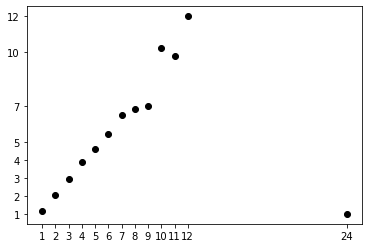

In [6]:
x, y = [], []
for key in num_gold_tokens_to_stats.keys():
    x.append(key)
    y.append(num_gold_tokens_to_stats[key]['num_predicted_tokens'])
plt.plot(x, y, 'o', color='black')

plt.xticks([num_gold_tokens for num_gold_tokens in num_gold_tokens_to_stats])
plt.yticks(list(set(round(num_gold_tokens_to_stats[num_gold_tokens]['num_predicted_tokens']) for num_gold_tokens in num_gold_tokens_to_stats)))
plt.show()

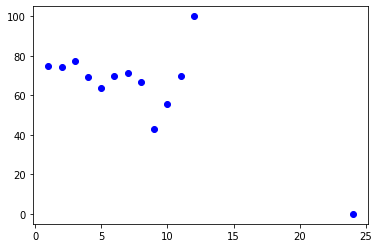

In [7]:
x, y = [], []
for key in num_gold_tokens_to_stats.keys():
    x.append(key)
    y.append(num_gold_tokens_to_stats[key]['em'])
plt.plot(x, y, 'o', color='blue')

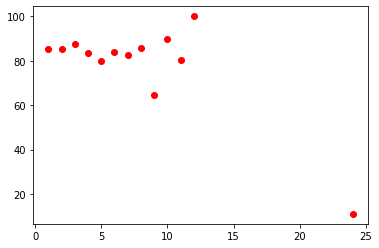

In [8]:
x, y = [], []
for key in num_gold_tokens_to_stats.keys():
    x.append(key)
    y.append(num_gold_tokens_to_stats[key]['f1'])
plt.plot(x, y, 'o', color='red')

In [11]:
for key in sorted(num_gold_tokens_to_stats.keys()):
    print(f"{key}: {num_gold_tokens_to_stats[key]['count']}")

1: 1323
2: 937
3: 983
4: 468
5: 327
6: 125
7: 66
8: 42
9: 14
10: 9
11: 10
12: 1
24: 1


In [12]:
for key in sorted(num_gold_tokens_to_stats.keys()):
    print(f"{key}: {num_gold_tokens_to_stats[key]['num_predicted_tokens']}")

1: 1.1436130007558578
2: 2.0789754535752403
3: 2.9664292980671414
4: 3.876068376068376
5: 4.626911314984709
6: 5.448
7: 6.515151515151516
8: 6.857142857142857
9: 7.0
10: 10.222222222222221
11: 9.8
12: 12.0
24: 1.0


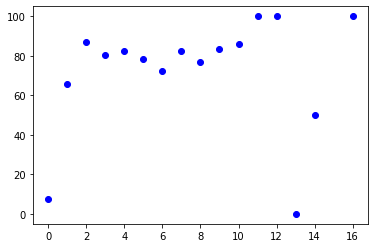

In [14]:
x, y = [], []
for key in num_occurrences_stats.keys():
    x.append(key)
    y.append(num_occurrences_stats[key]['em'])
plt.plot(x, y, 'o', color='blue')

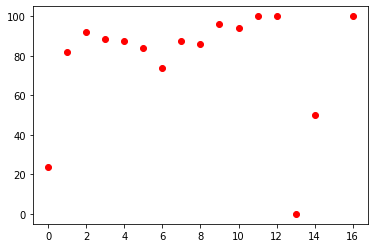

In [15]:
x, y = [], []
for key in num_occurrences_stats.keys():
    x.append(key)
    y.append(num_occurrences_stats[key]['f1'])
plt.plot(x, y, 'o', color='red')